# Analysis Results Notebook

This notebook analyzes the results from different models' performance on medical report analysis:
- FLAN T5 (baseline and fine-tuned)
- GPT-4.1
- DeepSeek

We'll examine:
1. Model predictions and judgments
2. Agreement between models
3. Specific phrase analysis
4. Performance on different types of medical reports

In [2]:
import os
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils_file import load_project_csv,count_yes_no,analyze_yes_without_no_acute_pattern


## Data Loading and Initial Exploration

Loading the results from different models and displaying sample data from each dataset to understand the structure and content.

In [3]:
# Load outputs from flan-t5-base
flan_ft_df = load_project_csv("outputs/flan-t5-base/finetuned_model_test_results.csv")
flan_baseline_judged_df = load_project_csv("outputs/flan-t5-base/results_with_azure_gpt_judgment_baseline.csv")
flan_finetuned_judged_df = load_project_csv("outputs/flan-t5-base/results_with_azure_gpt_judgment.csv")
flan_generated_300_df = load_project_csv("outputs/flan-t5-base/generated_impressions_300_flan.csv")


# Load outputs from gpt_deepseek
gpt41_df = load_project_csv("outputs/gpt_deepseek/gpt4_1_acute_findings_vs_ground_truth.csv")
gpt41_judged_df = load_project_csv("outputs/gpt_deepseek/gpt41_judged_results.csv")
deepseek_df = load_project_csv("outputs/gpt_deepseek/deepseek_acute_findings_vs_ground_truth.csv")
deepseek_judged_df = load_project_csv("outputs/gpt_deepseek/deepseek_judged_results.csv")

# Display heads
print("\n===== FLAN Fine-tuned Predictions =====")
display(flan_ft_df.head())

print("\n===== FLAN Baseline Judged =====")
display(flan_baseline_judged_df.head())

print("\n===== FLAN Fine-tuned Judged =====")
display(flan_finetuned_judged_df.head())

print("\n===== FLAN Generated 300 =====")
display(flan_generated_300_df.head())

print("\n===== GPT-4.1 Predictions =====")
display(gpt41_df.head())

print("\n===== GPT-4.1 Judged =====")
display(gpt41_judged_df.head())

print("\n===== DeepSeek Predictions =====")
display(deepseek_df.head())

print("\n===== DeepSeek Judged =====")
display(deepseek_judged_df.head())



===== FLAN Fine-tuned Predictions =====


,uid,generated_impression,true_impression
0,NaN,Low lung volumes with bronchovascular crowding...,Low lung volumes. No acute pulmonary disease.
1,NaN,No acute cardiopulmonary abnormality.,No active disease.
2,NaN,No acute cardiopulmonary abnormality.,No acute cardiopulmonary disease.
3,NaN,No acute cardiopulmonary abnormality.,1. No acute pulmonary disease.
4,NaN,No acute cardiopulmonary abnormality.,There is no evidence of acute cardiopulmonary ...



===== FLAN Baseline Judged =====


,uid,generated_impression,true_impression,gpt_equivalence
0,1,Normal chest x-ray.,Normal chest x-[REDACTED].,Yes
1,2,MeSH: Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.,No
2,4,"Pulmonary Disease, Chronic Obstructive;Bullous...",1. Bullous emphysema and interstitial fibrosis...,No
3,5,Osteophyte;Thickening;Lung,No acute cardiopulmonary abnormality.,No
4,6,Normal chest x-ray. Image: PA and Lateral Ches...,No acute cardiopulmonary findings.,No



===== FLAN Fine-tuned Judged =====


,uid,generated_impression,true_impression,gpt_equivalence
0,NaN,Low lung volumes with bronchovascular crowding...,Low lung volumes. No acute pulmonary disease.,No
1,NaN,No acute cardiopulmonary abnormality.,No active disease.,No
2,NaN,No acute cardiopulmonary abnormality.,No acute cardiopulmonary disease.,Yes
3,NaN,No acute cardiopulmonary abnormality.,1. No acute pulmonary disease.,Yes
4,NaN,No acute cardiopulmonary abnormality.,There is no evidence of acute cardiopulmonary ...,Yes



===== FLAN Generated 300 =====


,uid,generated_impression,true_impression
0,1,Normal chest x-ray.,Normal chest x-[REDACTED].
1,2,MeSH: Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.
2,4,"Pulmonary Disease, Chronic Obstructive;Bullous...",1. Bullous emphysema and interstitial fibrosis...
3,5,Osteophyte;Thickening;Lung,No acute cardiopulmonary abnormality.
4,6,Normal chest x-ray. Image: PA and Lateral Ches...,No acute cardiopulmonary findings.



===== GPT-4.1 Predictions =====


,uid,acute_findings_report,ground_truth_impression
0,511,No acute findings.,No acute findings.
1,3211,Small bilateral pleural effusions.,1. Probable small bilateral pleural effusions....
2,1588,No acute findings.,Normal chest
3,2341,No acute findings.,No acute process.
4,2571,No acute findings.,No acute cardiopulmonary disease.



===== GPT-4.1 Judged =====


,uid,acute_findings_report,ground_truth_impression,gpt_equivalence
0,511,No acute findings.,No acute findings.,Yes
1,3211,Small bilateral pleural effusions.,1. Probable small bilateral pleural effusions....,Yes
2,1588,No acute findings.,Normal chest,Yes
3,2341,No acute findings.,No acute process.,Yes
4,2571,No acute findings.,No acute cardiopulmonary disease.,Yes



===== DeepSeek Predictions =====


,uid,acute_findings_report,ground_truth_impression
0,511,Hyperaerated lungs with flattened hemidiaphrag...,No acute findings.
1,3211,Small bilateral pleural effusions. Atheroscler...,1. Probable small bilateral pleural effusions....
2,1588,No acute findings.,Normal chest
3,2341,No acute findings.,No acute process.
4,2571,No acute findings.,No acute cardiopulmonary disease.



===== DeepSeek Judged =====


,uid,acute_findings_report,ground_truth_impression,gpt_equivalence
0,511,Hyperaerated lungs with flattened hemidiaphrag...,No acute findings.,No
1,3211,Small bilateral pleural effusions. Atheroscler...,1. Probable small bilateral pleural effusions....,No
2,1588,No acute findings.,Normal chest,Yes
3,2341,No acute findings.,No acute process.,Yes
4,2571,No acute findings.,No acute cardiopulmonary disease.,Yes


## Model Agreement Analysis - Basic Statistics

Calculating basic agreement statistics between different models:
- Total number of Yes/No judgments for each model
- Percentage distribution of judgments
- Overall model performance comparison

In [4]:
# Load judged files
gpt41_judged_df = load_project_csv("outputs/gpt_deepseek/gpt41_judged_results.csv")
deepseek_judged_df = load_project_csv("outputs/gpt_deepseek/deepseek_judged_results.csv")
flan_finetuned_judged_df = load_project_csv("outputs/flan-t5-base/results_with_azure_gpt_judgment.csv")

# Using count_yes_no from utils_file.py

# Analyze each dataset
gpt_yes, gpt_no, gpt_total = count_yes_no(gpt41_judged_df)
deepseek_yes, deepseek_no, deepseek_total = count_yes_no(deepseek_judged_df)
flan_yes, flan_no, flan_total = count_yes_no(flan_finetuned_judged_df)

# Print results
print(f"\n===== GPT-4.1 Judged =====\nYes: {gpt_yes}, No: {gpt_no}, Total: {gpt_total}")
print(f"\n===== DeepSeek Judged =====\nYes: {deepseek_yes}, No: {deepseek_no}, Total: {deepseek_total}")
print(f"\n===== FLAN Fine-tuned Judged =====\nYes: {flan_yes}, No: {flan_no}, Total: {flan_total}")



===== GPT-4.1 Judged =====
Yes: 1284, No: 381, Total: 1666

===== DeepSeek Judged =====
Yes: 1309, No: 357, Total: 1666

===== FLAN Fine-tuned Judged =====
Yes: 318, No: 349, Total: 667


## Model Agreement Analysis - Binary Comparison

Analyzing the agreement between models using boolean comparison:
- Converting judgments to boolean values
- Calculating agreement rates
- Identifying cases of disagreement

In [5]:
# Prepare Yes/No as booleans
gpt_yes_series = gpt41_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")
deepseek_yes_series = deepseek_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")

# Compare line by line
comparison_df = pd.DataFrame({
    "gpt41_yes": gpt_yes_series,
    "deepseek_yes": deepseek_yes_series,
    "same_answer": gpt_yes_series == deepseek_yes_series
})

# Count how many agree
total = len(comparison_df)
agree_count = comparison_df["same_answer"].sum()
disagree_count = total - agree_count

print(f"✅ Total rows: {total}")
print(f"✅ Rows where both models agree: {agree_count} ({agree_count / total * 100:.1f}%)")
print(f"✅ Rows where models disagree: {disagree_count} ({disagree_count / total * 100:.1f}%)")


✅ Total rows: 1666
✅ Rows where both models agree: 1395 (83.7%)
✅ Rows where models disagree: 271 (16.3%)


## Detailed Disagreement Analysis

Examining specific cases where models disagree:
- Comparing model outputs side by side
- Analyzing the nature of disagreements
- Identifying patterns in disagreement cases

## Model Output Comparison

Detailed comparison of model outputs:
- Analysis of generated text
- Comparison with ground truth
- Identification of systematic differences

In [6]:
# Prepare Yes/No as booleans
gpt_yes_series = gpt41_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")
deepseek_yes_series = deepseek_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")

# Compare line by line
comparison_df = pd.DataFrame({
    "gpt41_yes": gpt_yes_series,
    "deepseek_yes": deepseek_yes_series,
    "gpt41_equivalence": gpt41_judged_df["gpt_equivalence"],
    "deepseek_equivalence": deepseek_judged_df["gpt_equivalence"],
    "acute_findings_report": gpt41_judged_df["acute_findings_report"],
    "ground_truth_impression": gpt41_judged_df["ground_truth_impression"]
})

# Filter disagreements
disagreements = comparison_df[comparison_df["gpt41_yes"] != comparison_df["deepseek_yes"]]

print(f"✅ Total disagreements: {len(disagreements)}")

# Show a few examples
display(disagreements.sample(5, random_state=42))


✅ Total disagreements: 271


,gpt41_yes,deepseek_yes,gpt41_equivalence,deepseek_equivalence,acute_findings_report,ground_truth_impression
189,True,False,Yes,No,No acute findings.,Mild cardiomegaly with interstitial prominence...
739,False,True,No,Yes,"Persistent bilateral lower lobe opacities, sub...",1. No acute findings. 2. Bibasilar subsegmenta...
496,False,True,No,Yes,Mild pectus excavatum deformity.,No acute disease.
799,True,False,Yes,No,Bibasilar opacities concerning for atelectasis...,Stable cardiomegaly and persistent minimal bib...
1182,True,False,Yes,No,Acute or abnormal findings:\n- Left lower lobe...,1. Left lower lobe air space opacities without...


## Fine-tuning Impact Analysis

Analyzing the impact of fine-tuning on model performance:
- Identifying cases of improvement
- Quantifying the impact of fine-tuning
- Examining specific examples of improvement

In [7]:
# Convert judgments to booleans
baseline_yes = flan_baseline_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")
finetuned_yes = flan_finetuned_judged_df["gpt_equivalence"].str.strip().str.lower().str.startswith("yes")

# Find rows where baseline was No and fine-tuned is Yes
improved_cases = (baseline_yes == False) & (finetuned_yes == True)

# Count and display
count_improved = improved_cases.sum()
total = len(flan_baseline_judged_df)

print(f"✅ Found {count_improved} out of {total} rows where fine-tuning flipped the judgment from No → Yes.")

# Show some example rows
comparison_df = pd.DataFrame({
    "uid": flan_baseline_judged_df.get("uid", flan_baseline_judged_df.index),
    "baseline_equivalence": flan_baseline_judged_df["gpt_equivalence"],
    "finetuned_equivalence": flan_finetuned_judged_df["gpt_equivalence"],
    "baseline_generated": flan_baseline_judged_df["generated_impression"],
    "finetuned_generated": flan_finetuned_judged_df["generated_impression"],
    "ground_truth": flan_baseline_judged_df["true_impression"]
})

display(comparison_df[improved_cases].sample(5, random_state=42))


✅ Found 129 out of 300 rows where fine-tuning flipped the judgment from No → Yes.


,uid,baseline_equivalence,finetuned_equivalence,baseline_generated,finetuned_generated,ground_truth
127,152.0,No,Yes,"Fractures, Bone",No acute cardiopulmonary abnormality.,No acute findings.
91,106.0,No,Yes,Normal chest x-ray.,No acute cardiopulmonary abnormality.,No acute cardiopulmonary process. If there is ...
45,53.0,No,Yes,Lung;Opacity;Pulmonary Atelectasis,No acute cardiopulmonary abnormalities.,Low lung volumes with right basilar atelectasi...
71,85.0,No,Yes,There are scattered calcified granulomas. No f...,No acute cardiopulmonary abnormality.,No evidence of active disease.
255,300.0,No,Yes,Lung;Funnel Chest;Calcified Granuloma;Pulmonar...,No acute cardiopulmonary abnormality.,Changes of chronic lung disease with no acute ...


## Pattern Analysis

Analyzing the presence and impact of specific patterns in the reports:
1. Detection of "no acute" patterns in reports
2. Analysis of model performance on different patterns
3. Comparison of pattern recognition across models

In [8]:

# Regex pattern: starts with or contains "no acute" followed by word(s)
pattern = r"\bno acute\b"


In [9]:
analyze_yes_without_no_acute_pattern(flan_baseline_judged_df, name="FLAN Baseline")
analyze_yes_without_no_acute_pattern(flan_finetuned_judged_df, name="FLAN Fine-tuned")
analyze_yes_without_no_acute_pattern(gpt41_judged_df, name="GPT-4.1")
analyze_yes_without_no_acute_pattern(deepseek_judged_df, name="DeepSeek")


===== FLAN Baseline =====
Total YES judgments: 4
YES without 'no acute' pattern in ground truth: 4 (100.0%)

===== FLAN Fine-tuned =====
Total YES judgments: 318
YES without 'no acute' pattern in ground truth: 82 (25.8%)

===== GPT-4.1 =====
Total YES judgments: 1284
YES without 'no acute' pattern in ground truth: 522 (40.7%)

===== DeepSeek =====
Total YES judgments: 1309
YES without 'no acute' pattern in ground truth: 508 (38.8%)



## Visualization of Model Comparisons

Creating visualizations to compare the performance of different models:
1. YES percentage across different phrases
2. Model agreement visualization using scatter plots
3. Comparing judgment patterns between models

In [18]:
# Common medical report phrases to analyze
phrases = [
    'no acute cardiopulmonary abnormality',
    'no acute cardiopulmonary findings',
    'no acute cardiopulmonary abnormalities',
    'no acute cardiopulmonary disease',
    'no acute disease',
    'no acute cardiopulmonary process',
    'no acute radiographic cardiopulmonary process',
    'no acute cardiopulmonary abnormality identified',
    'no acute pulmonary disease',
    'no acute findings'
]

# Model dataframes in memory
model_dfs = {
    'GPT-4.1': gpt41_judged_df,
    'DeepSeek': deepseek_judged_df,
    'FLAN Baseline': flan_baseline_judged_df,
    'FLAN Fine-tuned': flan_finetuned_judged_df,
}

# Decision column (same column in all models)
judge_column = 'gpt_equivalence'

# Collecting results
all_results = []

for model_name, df in model_dfs.items():
    # Select impression column name based on the model
    if 'FLAN' in model_name:
        impression_column = 'true_impression'
    else:
        impression_column = 'ground_truth_impression'
    
    for phrase in phrases:
        filtered = df[df[impression_column].str.contains(phrase, case=False, na=False)]
        # Filter only rows with Yes or No
        filtered_clean = filtered[filtered[judge_column].str.lower().isin(['yes', 'no'])]
        yes_count = (filtered_clean[judge_column].str.lower() == 'yes').sum()
        no_count = (filtered_clean[judge_column].str.lower() == 'no').sum()
        total = len(filtered_clean)
        
        all_results.append({
            'Model': model_name,
            'Phrase': phrase,
            'Total': total,
            'YES': yes_count,
            'NO': no_count,
            'YES (%)': round(yes_count / total * 100, 1) if total > 0 else 0,
            'NO (%)': round(no_count / total * 100, 1) if total > 0 else 0
        })

# Summary table
final_df = pd.DataFrame(all_results)

# Display results on screen
# Save the table as CSV

# Define the new path inside outputs
output_dir = 'outputs/Analyze_Results_outputs'
os.makedirs(output_dir, exist_ok=True)

# Build the full file name
output_path = os.path.join(output_dir, 'judgment_phrase_summary.csv')

# Save the file
final_df.to_csv(output_path, index=False)

print(f"✅ Saved results to {output_path}")

✅ Saved results to outputs/Analyze_Results_outputs\judgment_phrase_summary.csv


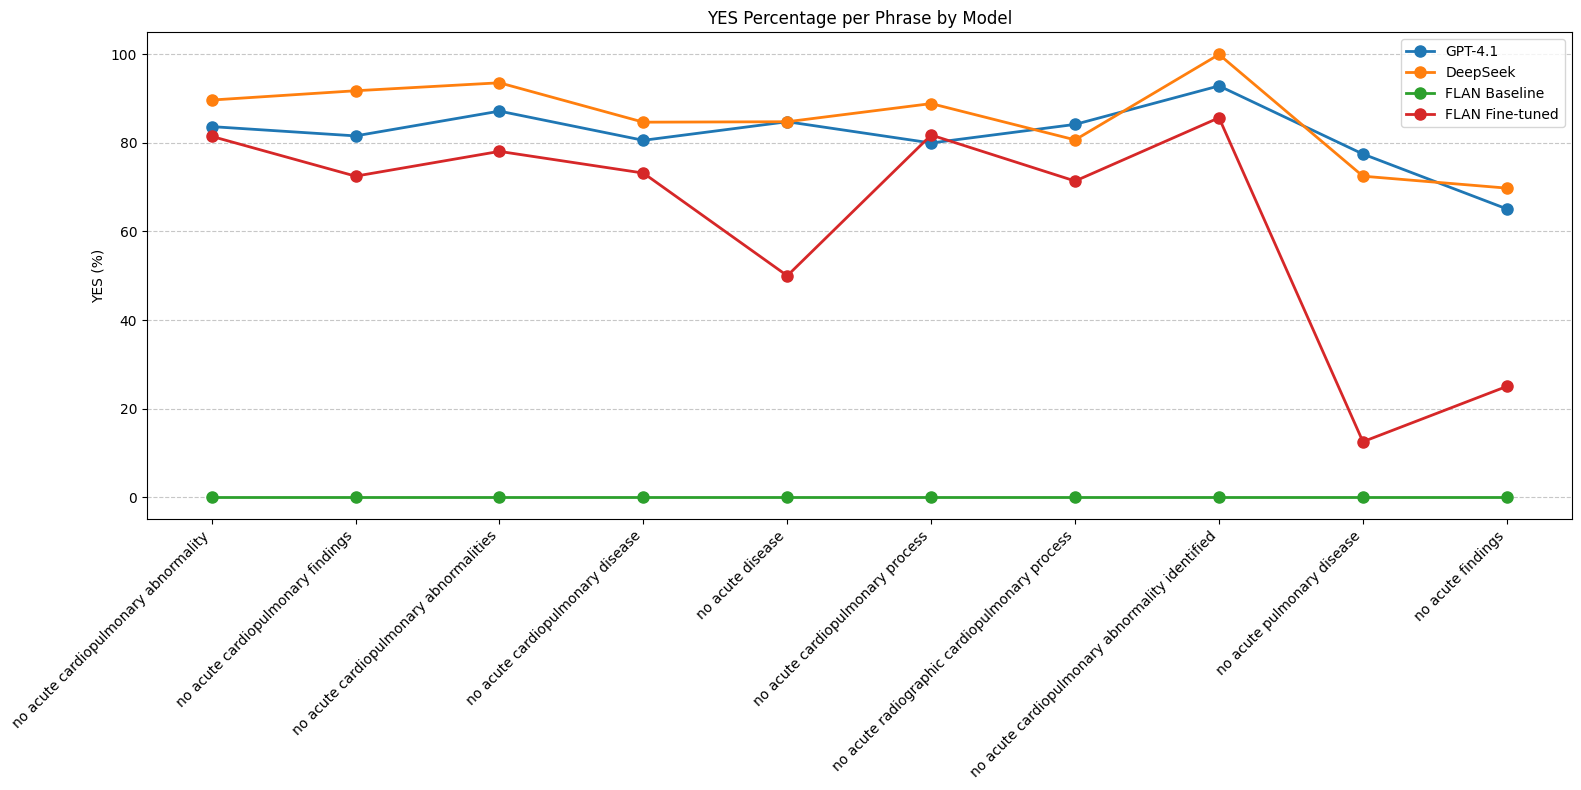

In [ ]:


# Read the file
df = pd.read_csv('outputs/Analyze_Results_outputs/judgment_phrase_summary.csv')

# Ensure columns are properly formatted
df['Phrase'] = df['Phrase'].str.strip()

# Plot graph: YES percentages
plt.figure(figsize=(16, 8))

for model in df['Model'].unique():
    subset = df[df['Model'] == model]
    plt.plot(subset['Phrase'], subset['YES (%)'], marker='o', linewidth=2, markersize=8, label=model)

plt.xticks(rotation=45, ha='right')
plt.ylabel('YES (%)')
plt.title('YES Percentage per Phrase by Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

